We spent alot of time developing/engineering features for our dataset. Now, we have completed that we have a large number of features. We need a way to create a model that only includes the most important features. We can reduce the variance of the model (overfitting). We can also reduce the computational cost of training a model. The process of identifying only the most relevant features is called `feature selection`. We are going to using `Random Forest` model.

We use the tree-based strategies used by `Random Forests` naturally ranks by how well they improve the purity of the node. This mean decrease in impurity over all trees (called `gini impurity`). Nodes with the greatest decrease in impurity happen at the start of the trees while nodes with the least decrease occur at the end. By pruing below a particular node, we can create a subset of the most important features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline

legitimate_urls = pd.read_csv("data/legitimate-urls.csv")
phishing_urls = pd.read_csv("data/phishing-urls.csv")

In [2]:
def check_net(item):
    if '.net' in item:
        return 1
    else:
        return 0

In [3]:
legitimate_urls['check_net'] = legitimate_urls['Domain'].apply(check_net)
phishing_urls['check_net'] = phishing_urls['Domain'].apply(check_net)

In [4]:
legitimate_urls[legitimate_urls['check_net'] == 1]

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic,check_net
12,darkkaminari.net,0,0,NaN,0,http,0,0,0,1,1,1,0,0,1,0,1,1
13,www.iei.net,0,0,/~bkos1/velneko.htm,0,http,0,2,0,0,0,1,0,0,1,0,1,1
19,www.nemurokinenkan.net,0,0,NaN,0,http,0,0,0,1,1,1,0,0,1,0,1,1
27,ryogamasaki.netfirms.com,0,0,/,0,http,0,0,0,0,0,0,0,0,1,0,0,1
44,www.three-musketeers.net,0,0,/mike/animeopinions.html,1,http,0,2,2,0,0,1,0,0,0,0,2,1
61,www.cruelangel.net,0,0,/divinitas/,0,http,0,0,0,1,1,1,0,0,1,0,1,1
63,www.orchidveil.net,0,0,/trapdoor/,0,http,0,0,0,0,0,0,0,0,0,0,1,1
66,www.yaoiluvr.net,0,0,NaN,0,http,0,0,0,1,1,1,0,0,1,0,1,1
74,www.clubclassic.net,0,0,/yaoi.html,0,http,0,2,0,0,0,1,0,0,0,0,2,1
89,www.worldshaking.net,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,1,1


In [5]:
phishing_urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic,check_net
0,asesoresvelfit.com,0,0,/media/datacredito.co/,0,http,0,0,0,0,0,1,0,1,0,1,1,0
1,caixa.com.br.fgtsagendesaqueconta.com,0,0,/consulta8523211/principal.php,0,http,0,1,1,0,0,1,0,1,1,0,1,0
2,hissoulreason.com,0,0,/js/homepage/home/,0,http,0,0,0,0,0,1,0,1,0,0,1,0
3,unauthorizd.newebpage.com,0,0,/webapps/66fbf/,0,http,0,0,0,0,0,1,0,1,1,0,1,0
4,133.130.103.10,0,1,/23/,0,http,0,2,0,1,0,1,0,1,0,0,1,0


Data is in two data frames so we merge them to make one dataframe. This is easy to do because two dataframes has same column names.

In [6]:
urls = legitimate_urls.append(phishing_urls)

<ipython-input-6-a3d55c9458ea>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  urls = legitimate_urls.append(phishing_urls)


In [7]:
urls.head(5)

,Domain,Having_@_symbol,Having_IP,Path,Prefix_suffix_separation,Protocol,Redirection_//_symbol,Sub_domains,URL_Length,age_domain,dns_record,domain_registration_length,http_tokens,label,statistical_report,tiny_url,web_traffic,check_net
0,www.liquidgeneration.com,0,0,/,0,http,0,0,0,0,0,1,0,0,0,0,2,0
1,www.onlineanime.org,0,0,/,0,http,0,0,0,0,0,1,0,0,1,0,1,0
2,www.ceres.dti.ne.jp,0,0,/~nekoi/senno/senfirst.html,0,http,0,1,0,1,0,1,0,0,0,0,0,0
3,www.galeon.com,0,0,/kmh/,0,http,0,0,0,0,0,0,0,0,0,0,0,0
4,www.fanworkrecs.com,0,0,/,0,http,0,0,0,1,1,1,0,0,1,0,1,0


In [8]:
urls.dtypes

Domain                        object
Having_@_symbol                int64
Having_IP                      int64
Path                          object
Prefix_suffix_separation       int64
Protocol                      object
Redirection_//_symbol          int64
Sub_domains                    int64
URL_Length                     int64
age_domain                     int64
dns_record                     int64
domain_registration_length     int64
http_tokens                    int64
label                          int64
statistical_report             int64
tiny_url                       int64
web_traffic                    int64
check_net                      int64
dtype: object

In [9]:
# Removed the Categorical variables
urls = urls.drop(columns=['Domain', 'Path', 'Protocol', 'Having_IP', 'http_tokens', 'Redirection_//_symbol'])

Since we merged two dataframes top 1000 rows will have legitimate urls and bottom 1000 rows will have phishing urls. So if we split the data now and create a model for it will overfit so we need to shuffle the rows before splitting the data into training set and test set

In [10]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urls = urls.sample(frac=1).reset_index(drop=True)

Removing class variable from the dataset

In [11]:
urls_without_labels = urls.drop('label',axis=1)
urls_without_labels.columns
labels = urls['label']

Splitting the data into train data and test data
Dividing the data in the ratio of 70:30 [train_data:test_data]

In [12]:
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [13]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1410 605 1410 605


Checking the split of labels in train and test data
The split should be in equal proportion for both classes

Phishing = 1

Legitimate = 0

In [14]:
#initially checking the split of labels_train data 
labels_train.value_counts()

0    706
1    704
Name: label, dtype: int64

By above results it is shown that the split of both classes are almost equal!

Testing the same for labels of test data also

In [15]:
#checking the split for labels_test data
labels_test.value_counts()

0    311
1    294
Name: label, dtype: int64

as the split is almost in equal proportion we can train the model

# Create the model & fit the data into the model

creating the model with default parameters

In [16]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(data_train,labels_train)

RandomForestClassifier()

In [17]:
# Predict the result for the test data
prediction_label = random_forest_classifier.predict(data_test)

Creating confusion matrix and checking the accuracy

`Accuracy` is one metric for evaluating classification models. Accuracy is the fraction of predictions our model got right. Also know as the number of correct predictions / total number of predictions

Confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

In [18]:
cm = confusion_matrix(labels_test,prediction_label)
print(cm)
accuracy_score(labels_test,prediction_label)

[[276  35]
 [ 42 252]]


0.8727272727272727

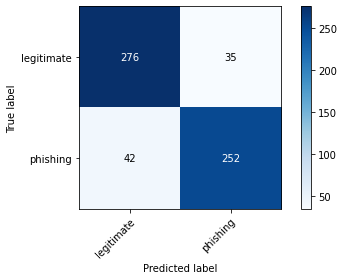

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classes = ['legitimate', 'phishing']
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

## Feature Importance

This method returns the quantified relative importance in the order the features were fed to the algorithm.


 Feature ranking: 

Feature name : Importance
{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 

{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} 



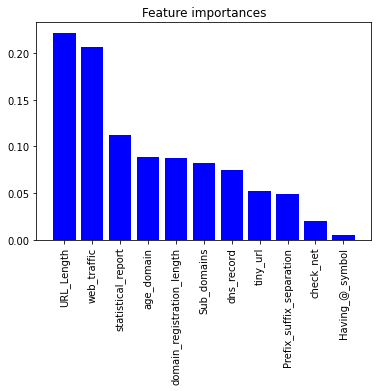

In [20]:
importances = random_forest_classifier.feature_importances_

#To make the plot pretty, we’ll instead sort the features from most to least important.
indices = np.argsort(importances)[::-1] 

# Print the feature ranking
print("\n Feature ranking: \n")
print("Feature name : Importance")

for f in range(data_train.shape[1]):
    print("{f+1} {data_train.columns[indices[f]]}   :  {importances[indices[f]]} \n")
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(data_train.shape[1]), importances[indices],
       color="b", align="center")   

plt.xticks(range(data_train.shape[1]), data_train.columns[indices], rotation='vertical')
plt.xlim([-1, data_train.shape[1]])

plt.rcParams['figure.figsize'] = (50,30)  #this will increase the size of the plot
plt.show()

# Exercise 2

Add you feature and see if the model's accuracy improves and where it ranks in feature importance